#IMPORTING LIBRARIES

In [49]:
import tensorflow as tf
import pandas as pd
import os

In [50]:
import matplotlib.pyplot as plt
import numpy as np

import plotly.express as px

In [51]:
import sys
# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
#warnings is a indicating the unusual conditions in our code and reduce reducinhhg the error disturbance.
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Dataset Loading

In [52]:
data=pd.read_csv('/content/drive/MyDrive/emoji_df.csv')
data.head()

,emoji,name,group,sub_group,codepoints
0,😀,grinning face,Smileys & Emotion,face-smiling,1F600
1,😃,grinning face with big eyes,Smileys & Emotion,face-smiling,1F603
2,😄,grinning face with smiling eyes,Smileys & Emotion,face-smiling,1F604
3,😁,beaming face with smiling eyes,Smileys & Emotion,face-smiling,1F601
4,😆,grinning squinting face,Smileys & Emotion,face-smiling,1F606


In [53]:
Ravdess = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
Crema = "/kaggle/input/cremad/AudioWAV/"
Tess = "/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
Savee = "/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/"


In [54]:
data.describe()

,emoji,name,group,sub_group,codepoints
count,4724,4724,4724,4724,4724
unique,4724,3655,9,99,4724
top,😀,eye in speech bubble,People & Body,person-role,1F600
freq,1,4,2998,635,1


# Data cleaning & Pre-processing

In [55]:
# using isnull() funtion for finding the null values
data.isnull().sum()

emoji         0
name          0
group         0
sub_group     0
codepoints    0
dtype: int64

In [56]:
data.notnull().sum()

emoji         4724
name          4724
group         4724
sub_group     4724
codepoints    4724
dtype: int64

In [57]:
data=data.dropna()
data

,emoji,name,group,sub_group,codepoints
0,😀,grinning face,Smileys & Emotion,face-smiling,1F600
1,😃,grinning face with big eyes,Smileys & Emotion,face-smiling,1F603
2,😄,grinning face with smiling eyes,Smileys & Emotion,face-smiling,1F604
3,😁,beaming face with smiling eyes,Smileys & Emotion,face-smiling,1F601
4,😆,grinning squinting face,Smileys & Emotion,face-smiling,1F606
...,...,...,...,...,...
4719,🇿🇲,flag: Zambia,Flags,country-flag,1F1FF 1F1F2
4720,🇿🇼,flag: Zimbabwe,Flags,country-flag,1F1FF 1F1FC
4721,🏴󠁧󠁢󠁥󠁮󠁧󠁿,flag: England,Flags,subdivision-flag,1F3F4 E0067 E0062 E0065 E006E E0067 E007F
4722,🏴󠁧󠁢󠁳󠁣󠁴󠁿,flag: Scotland,Flags,subdivision-flag,1F3F4 E0067 E0062 E0073 E0063 E0074 E007F


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4724 entries, 0 to 4723
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   emoji       4724 non-null   object
 1   name        4724 non-null   object
 2   group       4724 non-null   object
 3   sub_group   4724 non-null   object
 4   codepoints  4724 non-null   object
dtypes: object(5)
memory usage: 184.7+ KB


# Performing the Explore Data Analysis


1.   using ggplot2 analysing the first 100 data values.
2.   randomly analysing  data values for finding the most used emoji's the
     ggplot2.



In [59]:
fig=px.bar(data.head(100), x="group",y="emoji",color="name",template="ggplot2")
fig.show()

In [60]:
fig=px.bar(data.head(), x="emoji",y="name",color="sub_group",template="ggplot2")
fig.show()

In [61]:
fig=px.bar(data.head(100), x="emoji",y="name",color="codepoints",template="ggplot2")
fig.show()

#Ploty Dark
sub_group wise analysing the emoji's and its names.

In [62]:
fig = px.line(data, x="sub_group", y="name", color='emoji',markers=True,color_discrete_sequence=['White','orange'],template='plotly_dark')
fig.show()

#

In [63]:
train=pd.read_csv('/content/drive/MyDrive/emoji_df.csv')
test=pd.read_csv('/content/drive/MyDrive/emoji_df.csv')

In [64]:
train.isnull().sum()
print("Train Shape:",train.shape)
test.isnull().sum()
print("Test Shape:",test.shape)

Train Shape: (4724, 5)
Test Shape: (4724, 5)


In [65]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4724 entries, 0 to 4723
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   emoji       4724 non-null   object
 1   name        4724 non-null   object
 2   group       4724 non-null   object
 3   sub_group   4724 non-null   object
 4   codepoints  4724 non-null   object
dtypes: object(5)
memory usage: 184.7+ KB


In [66]:
mean = data.mean
mean()

<ipython-input-66-c8cdcfd5633b>:2: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



Series([], dtype: float64)

# Label Encoding

In [67]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [68]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in data.columns:
    if data[i].dtype == 'object':
        data[i]=l.fit_transform(data[i])

In [69]:
X = data.drop('codepoints',axis=1)
y = data['codepoints']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2)

In [70]:
train.codepoints.value_counts()

1F600                                          1
1F469 1F3FF 200D 2764 FE0F 200D 1F469 1F3FC    1
1F468 200D 1F468 200D 1F467 200D 1F466         1
1F468 200D 1F468 200D 1F467                    1
1F468 200D 1F468 200D 1F466                    1
                                              ..
1F470 200D 2642                                1
1F470 200D 2642 FE0F                           1
1F470 1F3FF                                    1
1F470 1F3FE                                    1
1F3F4 E0067 E0062 E0077 E006C E0073 E007F      1
Name: codepoints, Length: 4724, dtype: int64

correlation function

correlation function-->



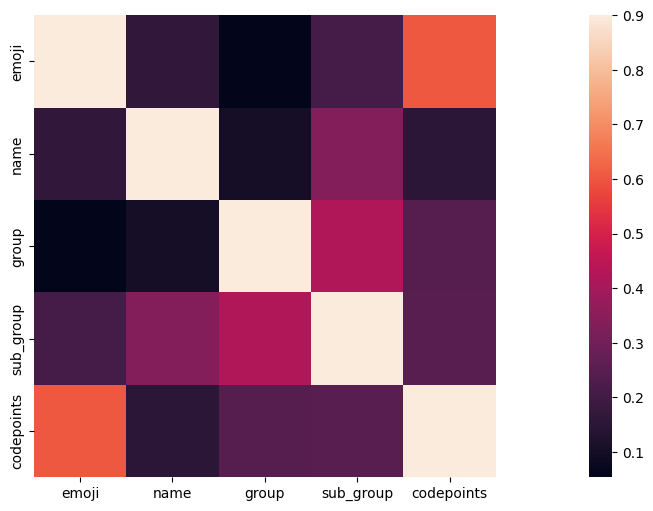

In [84]:
print("correlation function-->\n")
plt.figure(figsize=(24,6))
corrmat = data.corr()
sns.heatmap(corrmat, vmax=.9, square=True);
plt.show()

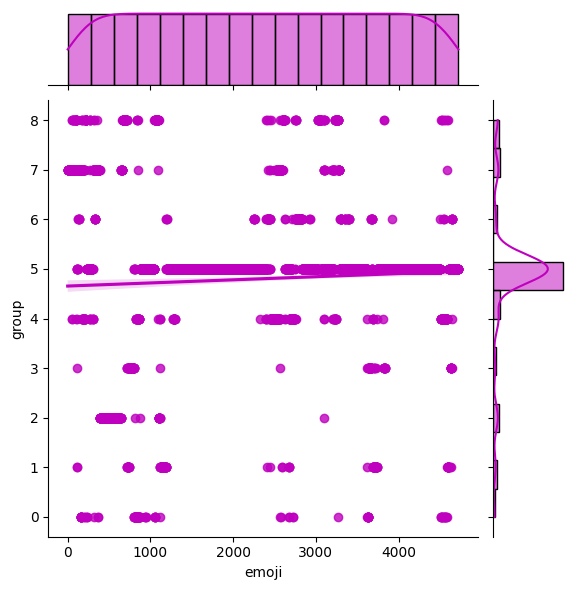

In [72]:
sns.jointplot(x='emoji',y='group',data=data,kind='reg',color='m')
plt.show()

# Linear Regression

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
lr = LinearRegression()
lr.fit(xtrain, ytrain)

# model testing

ytrain_pred = lr.predict(xtrain)

# evaluating the testing data

mse = mean_squared_error(ytrain, ytrain_pred)
rmse = (np.sqrt(mse))
r2 = r2_score(ytrain, ytrain_pred)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

#model training using regression

ytest_pred = lr.predict(xtest)

# evaluating the training data

mse = mean_squared_error(ytest, ytest_pred)
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)

The model performance for training set
--------------------------------------
MSE is 1046902.7392884785
RMSE is 1023.1826519681022
R2 score is 0.4342565024049291




In [73]:
mean=data.mean
mean()

emoji         2361.500000
name          1868.219306
group            4.802710
sub_group       54.468036
codepoints    2361.500000
dtype: float64